In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from datetime import datetime
import time
import seaborn as sns


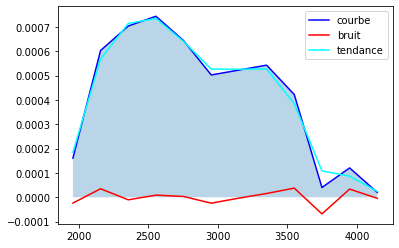

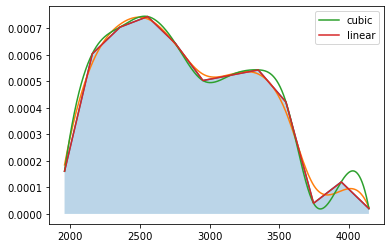

C:\Users\tayoy\Documents\GitHub\ResultAthle\algoStatCourse.ipynb:565: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  scipy.integrate.quad(lambda x: proxlin(x),densite[0][0], densite[0][-1])


In [2]:
from importnb import Notebook
with Notebook():
    import algoStatCourse


In [3]:
data=pd.read_csv("10_km_Riorges.csv")

In [4]:
data.head()

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles


In [5]:
data['h_duration'] = data['duration'].apply(lambda x : pd.to_datetime(x,unit="s").strftime('%H:%M:%S'))
data

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom,h_duration
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume,00:30:58
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien,00:31:30
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic,00:32:01
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume,00:32:15
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles,00:32:40
...,...,...,...,...,...,...,...,...,...,...,...
245,BARTASSOT Jean,0,D8,1980,M1M,0 days 01:05:58,0 days 00:35:00,3958.0,BARTASSOT,Jean,01:05:58
246,SURGET Laurent,0,D8,1965,M4M,0 days 01:06:37,0 days 00:35:39,3997.0,SURGET,Laurent,01:06:37
247,GENEVOIS Magali,0,D8,1986,M0F,0 days 01:07:18,0 days 00:36:20,4038.0,GENEVOIS,Magali,01:07:18
248,CAVELIER Clementine,0,D8,1990,SEF,0 days 01:07:20,0 days 00:36:22,4040.0,CAVELIER,Clementine,01:07:20


In [6]:
data['duration'].describe()

count     250.000000
mean     2809.836000
std       505.940003
min      1858.000000
25%      2380.000000
50%      2769.500000
75%      3165.500000
max      4245.000000
Name: duration, dtype: float64

Fonction permettant à l'athlète d'acquérir des données personnels sur sa performance :

In [7]:
def info_participant(x,y):
    z=data.index[data.Athlète==(y.upper()+" "+x.capitalize())]
    print("Votre temps d'arrivée est", data.loc[z[0],'h_duration'])
    print("Votre place d'arrivée est", data.index[z[0]]+1)
    print("Votre performance est classée", data.loc[z[0],'Performance'])
    print("Vous faites partie du top", math.ceil(((data.duration<=data.loc[z[0],'duration']).sum())/len(data)*100),"%")
    print("Vous êtes classé au rang", ((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])['duration'].rank()).loc[z[0]], "parmis les",len((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])),"athlètes ayant plus ou moins 5 ans de différence avec vous")

Exemple d'utilisation :

In [8]:
info_participant("charles","kemei")

Votre temps d'arrivée est 00:32:40
Votre place d'arrivée est 5
Votre performance est classée IR2
Vous faites partie du top 2 %
Vous êtes classé au rang 4.0 parmis les 89 athlètes ayant plus ou moins 5 ans de différence avec vous


In [10]:
#sns.kdeplot(data['duration'], shade=True,  alpha=.3) #remplacé par la fonction lissage, + propre
densite=algoStatCourse.dens(data['duration'], bins = 12) #calcule un array numpy 2*2 avec la fonction de densité estimée (absices en ligne 0, ordonnées en ligne 2)
fcubic=algoStatCourse.lissage(densite, sep = True) #fonction qui est un joli lissage visuel de la densité (interpolation cubique)
#/!\ ne pas utiliser fcubic hors des bornes de la densité : xmin = densite[0,0], xmax = densite[0,-1] (les x sont sur la premiere ligne)
flin=algoStatCourse.lissage(densite, sep = False, kind = 'linear') #fonction qui retourne la densité estimée
#/!\ ne pas utiliser flin hors des bornes de la densité : xmin = densite[0,0], xmax = densite[0,-1]
# Calcule du quantile 75% quantile

def truncf (f,xmin, xmax):
    #prend en argument la fonction de densité f (interpolée ou non, c'est un choix visuel) et retourne la même fonction mais mise à 0 hors de [xmin, xmax]
    #input : f :fonction (1 dimension)
    #     xmin : borne inf, nombre
    #     xmax : borne sup, nombre
    def f2 (x):
        if (x>=xmin)*(x<=xmax):
            return f(x)
        return np.nan
    
    return np.vectorize(f2)

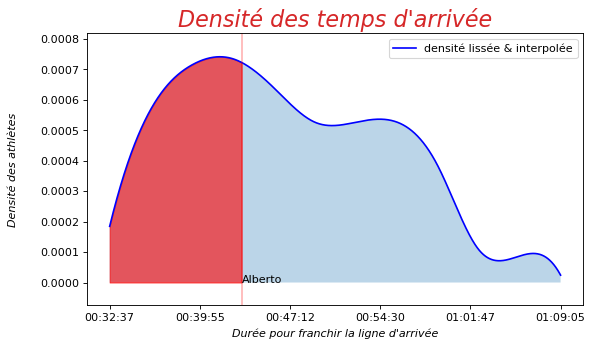

In [36]:
prenom="Alberto"
nom="BASILE"

def graphePerso(nom, prenom):
    z=data.index[data.Athlète==(nom.upper()+" "+prenom.capitalize())]
    quantile75 = np.quantile(data['duration'], ((data.duration<=data.loc[z[0],'duration']).sum())/len(data)) #proportion de meilleur temps
    
    x= np.linspace(densite[0,0], densite[0,-1], int(1e5)) #x pour un tracé continu

    tempsAxe = np.linspace(densite[0,0],densite[0,-1], 6) #les nouvelles abscisses en secondes
    labelTempsAxe = pd.Series(tempsAxe).apply(lambda x : pd.to_datetime(x,unit="s").strftime('%H:%M:%S')) #les nouvelles abscisses en écriture lisible

    plt.figure(figsize=(8,4.5), dpi=80) #format de la figure, (dpi pour la résolution)
    plt.fill_between(x, fcubic(x), alpha = 0.3) #fonction pour colorier l'aire sous la courbe
    plt.plot(x, fcubic(x), color = 'blue', label = 'densité lissée & interpolée')

    #plt.plot(x,flin(x), linestyle ='--', color = 'black', label = "densité réelle") #choisir laquelle dessiner et utiliser fill_between pour avoir l'aire coloriée

    plt.axvline(quantile75, color='r',alpha=0.3)

    f2=truncf(fcubic, densite[0,0], quantile75)
    plt.fill_between(x,f2(x), alpha = 0.6, color = 'red')

    #plt.axvspan(quantile75, densite[0,0], color='r', alpha=0.3)
    plt.legend() #permet d'afficher les legendes qu'on a mises dans les arguments 'label' des fonctions juste au dessus

    # Ajout des labels et titre
    plt.title("Densité des temps d'arrivée", color= 'tab:red', fontsize = '20', fontstyle = 'oblique') # titre
    plt.xlabel("Durée pour franchir la ligne d'arrivée", fontstyle = 'italic', labelpad=5)
    plt.ylabel("Densité des athlètes", fontstyle = 'italic', labelpad=20)
    plt.xticks(tempsAxe,labels = labelTempsAxe) #permet de choisir ce qu'on met sur l'axe des x : les coordonnees dans le premier argument, ce qu'il faut afficher dans l'autre.
    plt.ylim((-0.1*max(densite[1]),1.1*max(densite[1]))) # permet de choisir l'espace au dessus et au dessous du graphe
    plt.text(data.loc[z[0],'duration'],0,data.loc[z[0],'Prénom'] ) # ajoute un texte directement sur le graphe
    plt.show()
graphePerso("BASILE", "Alberto")

In [14]:
data.loc[z[0],'Prénom']

'Alberto'

In [29]:
def tracegraphe

1960.0

In [20]:
df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])

/var/folders/jy/77k463fj5d94h9zj3_qn_glh0000gn/T/ipykernel_8171/3200262511.py:1: FutureWarning: ['Athlète', 'Ligue', 'Performance', 'Catégorie', 'time_delta', 'time_gap', 'Nom', 'Prénom', 'h_duration'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])


Modélisation:

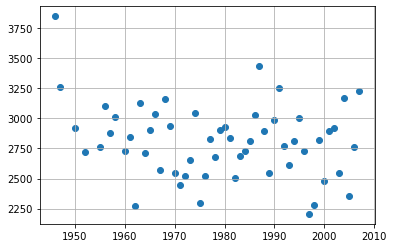

In [19]:
axes = plt.axes()
axes.grid() 
plt.scatter(df1.index,df1.loc[:,df1.columns[1]])
plt.show()